# Task

Select a set $S = { S_1, S_2, …, S_n }$ of sequences of events from the set $E$:
* the size of set E has to be at least 10: $\#{E} \ge 10$,
* the average length of sequences > 5: $E[len(S_i)] > 5$,
* $n > 200$. 

For example: $S$ are the sentences from some book (project Gutenberg), events are letters in the sentences - $E$ is the alphabet extended with punctuation marks and space.

Construct a transition matrix of a Markov chain summarizing selected set S. Consider two options: you start counting with
* all entries set to 0
* all entries set to 1
Starting with 1 is beneficial because we won't have zero's.

Define a value $v(S)$ of a sequence $S = e_1,e_2,…,e_k$ as a geometric mean of probabilities of the corresponding transitions

$v(S) = ( p(e_1,e_2) \times p(e_2,e_3) \times p(e_3,e_4) \times … \times p(e_{k-1},e_k) )^{1/(k-1)}$

$v(S)$ is a multiplication of probabilities. A large value of v(S) means S is specific for that Markov chain.

Compute the distribution of values $v(S)$ for all sequences from $S$. Compare it with (a distribution of) values of some other sequences - for example another book in some other language.

# Data

I like the idea about books. So, I chose four books for the task:

1. Wuthering Heights by Emily Bronte [link](http://www.gutenberg.org/ebooks/768), the file name is **768.txt.zip**. It's in English with some rare and some words.
2. Odes and Epodes by Horace [link](http://www.gutenberg.org/ebooks/9646)

I was interested a bit into comparing an 'old' English with the relatively 'modern' English. For that reason, I also compared the distribution for the books

3. Romeo and Juliet by William Shakespeare [link](http://www.gutenberg.org/ebooks/2261)

# Global Settings

In [47]:
import logging

import nltk
nltk.download('punkt')

import pandas as pd

pd.set_option('display.max_rows',    100)
pd.set_option('display.max_columns', 100)

import re
import sys

set_files = {1: 'data/768.txt.zip'}

logger = logging.getLogger('main')

if (logger.hasHandlers()):
    logger.handlers.clear()

logger.addHandler(logging.StreamHandler(sys.stdout))
logger.handlers[-1].setFormatter(logging.Formatter(fmt='%(asctime)s - %(levelname)s - %(message)s', 
                                                   datefmt='%Y-%m-%d %H:%M:%S'))

logger.setLevel(logging.DEBUG)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dmitry\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Parsing Data

In [48]:
import zipfile

file_name = set_files[1]

with zipfile.ZipFile(file_name) as z:
    text = z.read(z.namelist()[0]).decode('utf-8')
    
logger.info('Read the textual information of the length %d' % len(text))

# let's take only those between the start_markek and end_marker
start_marker = '\*\*\*START OF THE PROJECT GUTENBERG EBOOK.+?\*\*\*'
end_marker   = '\*\*\*END OF THE PROJECT GUTENBERG EBOOK.+?\*\*\*'

m = re.search(start_marker + '(.+?)' + end_marker, text, re.DOTALL)

if m:
    text = m[1]
    
logger.info('The length after taking the part between the markers: %d' % len(text))    

2018-06-24 01:03:10 - INFO - Read the textual information of the length 681636
2018-06-24 01:03:10 - INFO - The length after taking the part between the markers: 661977


In [49]:
words = nltk.tokenize.word_tokenize(text, language='english')

In [50]:
from collections import defaultdict

tm = defaultdict(dict)

for word in words:
    if word.isalpha() and len(word) > 1:
        for i in range(len(word) - 1):
            try:
                c = tm[word[i]][word[i+1]]
            except KeyError:
                tm[word[i]][word[i+1]] = 0
            tm[word[i]][word[i+1]] += 1

In [51]:
tm2 = pd.DataFrame(tm).fillna(0).astype('int').transpose().sort_index()

# adding missing columns
for column_name in tm2.index.difference(tm2.columns):
    tm2[column_name] = 0
        
tm2 = tm2.sort_index(axis=1)

tm2

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
A,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,1,0,0,0,0,0,0,0,0,0,7,0,0,0,18,0,10,0,0,0,9,3,190,0,3,0,21,34,36,5,0,0,0,0,0
B,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,37,0,0,0,8,0,0,2,0,0,7,0,0,9,0,0,116,0,0,0,11,0
C,0,0,0,0,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,498,0,0,0,1,0,0,19,0,0,0,1,0,0,31,0,0,9,0,0,0,0,0,0,0,0
D,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,59,0,0,0,14,0,0,0,0,0,54,0,0,4,0,0,1,0,0,0,0,0
E,1,0,0,0,0,0,0,0,1,0,0,2,0,1,0,0,0,35,0,0,0,0,0,0,0,0,133,0,4,115,0,0,0,1,0,0,0,87,1,7,0,0,0,3,0,1,0,6,0,2,0,0
F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,1,0,0,0,6,0,0,1,0,0,21,0,0,15,0,0,1,0,0,0,0,0
G,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,10,0,0,0,40,0,0,1,0,1,47,0,0,97,0,0,1,0,0,0,0,0
H,34,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,214,0,0,0,960,0,0,0,114,0,0,0,0,0,57,0,0,0,0,0,4,0,0,0,0,0
I,0,0,0,0,0,0,1,0,21,0,0,0,0,1,0,0,0,0,1,0,0,4,0,3,0,0,0,0,0,1,0,49,0,0,0,0,0,0,0,49,0,0,0,0,77,149,0,0,0,0,0,0
J,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,1,0,0,0,0,0,0,0,0,0,136,0,0,0,0,0,10,0,0,0,0,0


In [52]:
# converting to probabilities
for r in tm2.index:
    s = tm2.loc[r].sum()
    tm2.loc[r] = tm2.loc[r].apply(lambda x: x/s)
    # checking the transtion matrix is stationary
    s = round(tm2.loc[r].sum()) 
    if s != 1:
        raise ValueError('The matrix is not stationary for %s (sum = %.2f)' % (r, s))

tm2    

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
A,0.000000,0.002688,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.091398,0.0,0.002688,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.018817,0.000000,0.000000,0.000000,0.048387,0.000000,0.026882,0.000000,0.000000,0.000000,0.024194,0.008065,0.510753,0.000000,0.008065,0.000000,0.056452,0.091398,0.096774,0.013441,0.000000,0.000000,0.000000,0.000000,0.000000
B,0.000000,0.000000,0.0,0.0,0.005155,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.015464,0.000000,0.000000,0.000000,0.190722,0.000000,0.000000,0.000000,0.041237,0.000000,0.000000,0.010309,0.000000,0.000000,0.036082,0.000000,0.000000,0.046392,0.000000,0.000000,0.597938,0.000000,0.000000,0.000000,0.056701,0.000000
C,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.057336,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.839798,0.000000,0.000000,0.000000,0.001686,0.000000,0.000000,0.032040,0.000000,0.000000,0.000000,0.001686,0.000000,0.000000,0.052277,0.000000,0.000000,0.015177,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
D,0.000000,0.000000,0.0,0.0,0.006897,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.082759,0.000000,0.000000,0.000000,0.406897,0.000000,0.000000,0.000000,0.096552,0.000000,0.000000,0.000000,0.000000,0.000000,0.372414,0.000000,0.000000,0.027586,0.000000,0.000000,0.006897,0.000000,0.000000,0.000000,0.000000,0.000000
E,0.002500,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.002500,0.0,0.0,0.005000,0.0,0.002500,0.0,0.000000,0.0,0.087500,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.332500,0.000000,0.010000,0.287500,0.000000,0.000000,0.000000,0.002500,0.000000,0.000000,0.000000,0.217500,0.002500,0.017500,0.000000,0.000000,0.000000,0.007500,0.000000,0.002500,0.000000,0.015000,0.000000,0.005000,0.000000,0.000000
F,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.134615,0.000000,0.000000,0.000000,0.019231,0.000000,0.000000,0.000000,0.115385,0.000000,0.000000,0.019231,0.000000,0.000000,0.403846,0.000000,0.000000,0.288462,0.000000,0.000000,0.019231,0.000000,0.000000,0.000000,0.000000,0.000000
G,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.005025,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.005025,0.000000,0.000000,0.000000,0.050251,0.000000,0.000000,0.000000,0.201005,0.000000,0.000000,0.005025,0.000000,0.005025,0.236181,0.000000,0.000000,0.487437,0.000000,0.000000,0.005025,0.000000,0.000000,0.000000,0.000000,0.000000
H,0.024531,0.000000,0.0,0.0,0.001443,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000722,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.154401,0.000000,0.000000,0.000000,0.692641,0.000000,0.000000,0.000000,0.082251,0.000000,0.000000,0.000000,0.000000,0.000000,0.041126,0.000000,0.000000,0.000000,0.000000,0.000000,0.002886,0.000000,0.000000,0.000000,0.000000,0.000000
I,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.002809,0.000000,0.058989,0.0,0.0,0.000000,0.0,0.002809,0.0,0.000000,0.0,0.000000,0.002809,0.000000,0.000000,0.011236,0.0,0.008427,0.0,0.0,0.000000,0.000000,0.000000,0.002809,0.000000,0.137640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.137640,0.000000,0.000000,0.000000,0.000000,0.216292,0.418539,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
J,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,

In [53]:
import networkx as nx

G = nx.from_pandas_adjacency(tm2)
G.name = 'Graph from pandas adjacency matrix'
print(nx.info(G))

Name: Graph from pandas adjacency matrix
Type: Graph
Number of nodes: 52
Number of edges: 433
Average degree:  16.6538


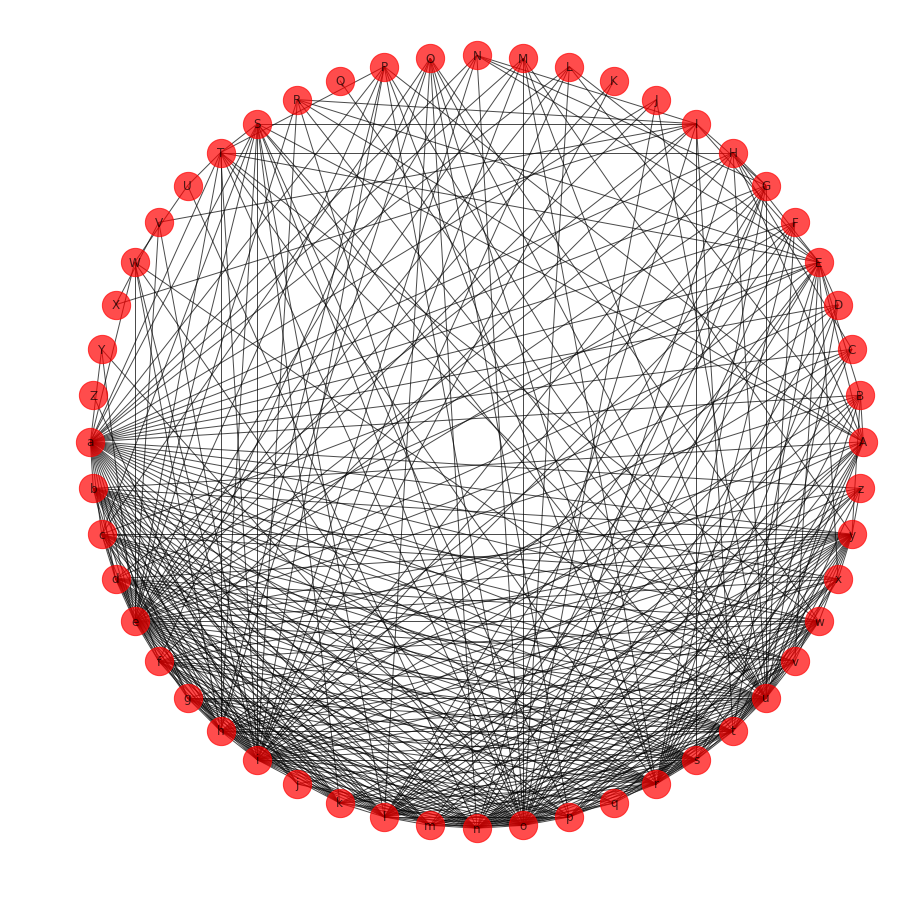

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))

nx.draw_shell(G, with_labels = True, node_size = 800, alpha = 0.7, arrows = True)

# References
1. [The projects' descriptions on Vlado's site](http://vladowiki.fmf.uni-lj.si/doku.php?id=ru:hse:snet:stu)
2. [DataCamp: Markov Chains in Python: Beginner Tutorial](https://www.datacamp.com/community/tutorials/markov-chains-python-tutorial)